In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np

In [140]:
url = "https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/Mall_Customers.csv"
data = pd.read_csv(url)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [141]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [142]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [123]:
columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

In [144]:
data = pd.get_dummies(data, columns=["Gender"], drop_first=True, dtype=int)
data = data.drop(columns=["CustomerID"])

In [145]:
X = data.drop('Spending Score (1-100)', axis=1).values
y = data['Spending Score (1-100)'].values

In [146]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 훈련 데이터와 테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((160, 3), (160,), (40, 3), (40,))

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

# 모델 생성
model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# 옵티마이저 설정 (lr 대신 learning_rate 사용)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 3407.5811 - mse: 3407.5811 - val_loss: 2079.7747 - val_mse: 2079.7747
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3108.7637 - mse: 3108.7637 - val_loss: 1733.3457 - val_mse: 1733.3457
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2303.8784 - mse: 2303.8784 - val_loss: 1424.9294 - val_mse: 1424.9294
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1929.2488 - mse: 1929.2488 - val_loss: 1186.4543 - val_mse: 1186.4543
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1682.6459 - mse: 1682.6459 - val_loss: 993.5580 - val_mse: 993.5580
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1411.6324 - mse: 1411.6324 - val_loss: 871.3184 - val_mse: 871.3184
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1160.6405 - mse: 1160.6405 - val_loss: 831.7113 - val_mse: 831.7113
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1118.0518 - mse: 1118.0518 - val_loss: 866.9216 - val_mse: 8

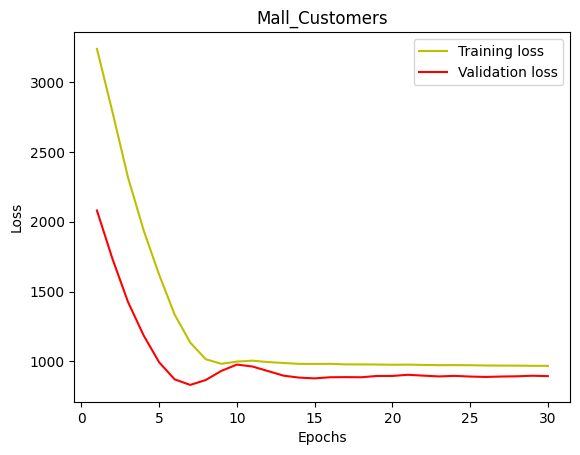

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Mall_Customers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

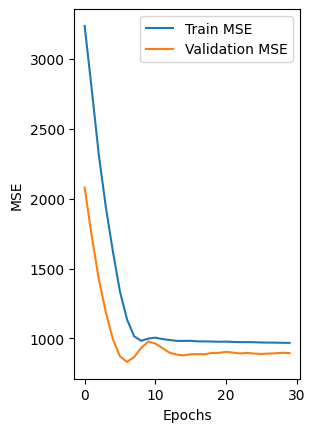

In [153]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [154]:
y_pred = model.predict(X_test_scaled)

# 9. 성능 평가 (MSE)
mse = mse(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean Squared Error (MSE): 2362.05
